In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.stats import pearsonr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
from cnmf import cNMF, save_df_to_npz, load_df_from_npz
import harmonypy
from adjustText import adjust_text

from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
from matplotlib.pyplot import rc_context
import matplotlib.colors as clr


def save_df_to_text(obj, filename):
    obj.to_csv(filename, sep='\t')


In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [3]:
sys.path.append('../../Code/')
from utils import read_dataset_log

In [4]:
! pwd

/data/srlab1/TCAT/Analysis/TCAT


In [5]:
figdir = '../../Figures/Components'

In [6]:
gep_info = read_dataset_log('cGEP_Name')
gep_info.index = gep_info['cGep_Name']
gep_info.head()
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))

In [7]:
oldname_map = dict(zip(gep_info['Old_Short_Name'], gep_info['Short_Name']))

In [8]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params = params[params['dataset_type']=='discovery']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,scores_fn,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Activ...,...,

In [9]:
cgep_params = read_dataset_log('cGEP Paths').iloc[0,:]
cgep_params

clustering_fn                                  /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                  /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                    /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
reference_fn                                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
renamed_ref_fn                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra                            /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons             /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                     /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons      /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons 

In [10]:
usage_all = {}
meta_dict = {}
# usage = pd.DataFrame()
meta = pd.DataFrame()

for dataset in params.index:
    usage_ds = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
    usage_all[dataset] = usage_ds
    
    meta_ds = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
    meta_dict[dataset] = meta_ds
    
    meta_ds = pd.DataFrame({'cell': meta_dict[dataset].index,
                   'cluster': meta_dict[dataset][params.loc[dataset, 'cluster_col']],
                    'dataset': dataset}, 
                   index = meta_dict[dataset].index)
    meta = pd.concat([meta, meta_ds])


/tmp/ipykernel_105038/1131168793.py:10: DtypeWarning: Columns (18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_ds = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
/tmp/ipykernel_105038/1131168793.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_ds = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')


In [11]:
usage = pd.concat(usage_all.values())
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [12]:
meta.shape, usage.shape

((1709860, 3), (1709860, 52))

In [12]:
meta = meta.loc[usage.index, :]

In [14]:
usage.columns

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet', 'NME1/FABP5',
       'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton', 'Heatshock',
       'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid', 'Metallothionein',
       'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive', 'Treg', 'Th17-Resting',
       'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM', 'TIMD4/TIM3',
       'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19', 'Th2-Activated',
       'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell', 'Th1-Like', 'CTLA4/CD38',
       'CD8-Trm', 'Th17-Activated', 'Tfh-2', 'OX40/EBI3', 'CD172a/MERTK',
       'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph',
       'Exhaustion', 'Tfh-1'],
      dtype='object')

In [13]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']
lineage_geps = list(gep_info[gep_info['Class']=='Lineage']['Short_Name'].values)

In [14]:
doublets_geps = list(gep_info.loc[gep_info['Class'] == 'Doublet Lineage', 'Short_Name'].dropna().values)
doublets_geps

['Doublet-RBC',
 'Doublet-Platelet',
 'Doublet-Plasmablast',
 'Doublet-Bcell',
 'Doublet-Myeloid',
 'Doublet-Fibroblast']

In [17]:
lineage_geps

['CD8-EM',
 'MAIT',
 'Treg',
 'CD4-Naive',
 'TEMRA',
 'CD4-CM',
 'gdT',
 'Th22',
 'Th17-Resting',
 'Th2-Resting',
 'Th1-Like',
 'CD8-Naive',
 'CD8-Trm',
 'Tfh-2',
 'Tph',
 'Tfh-1']

In [15]:
ds_res_fn = '/data/srlab1/TCAT/Data/TCAT/Proliferation/Proliferation.AllDataset.PerSamplePairedTtest.tsv'
ds_res = pd.read_csv(ds_res_fn, index_col = 0, sep = '\t')

meta_res_fn = '/data/srlab1/TCAT/Data/TCAT/Proliferation/Proliferation.AllDataset.PerSamplePairedTtest.Metaanalysis.tsv'
meta_res = pd.read_csv(meta_res_fn, index_col = 0, sep = '\t')

# ds_res['GEP'] = ds_res['GEP'].map(oldname_map)
# meta_res.index = meta_res.index.map(oldname_map)

In [16]:
cc_assoc_geps = list(meta_res['P'][(meta_res['P']< 0.05) & (meta_res['Mean_Log2_Ratio']>0)].index)
cc_assoc_geps

['NME1/FABP5',
 'TIMD4/TIM3',
 'HLA',
 'Exhaustion',
 'Cytoskeleton',
 'ICOS/CD38',
 'CTLA4/CD38',
 'OX40/EBI3',
 'Th17-Activated',
 'Metallothionein',
 'IL10/IL19',
 'Tph']

# Heatmap of proliferation by lineage + prolif-associated GEPs

In [17]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap


In [18]:
dataset = 'COMBAT'


In [21]:
meta_dict[dataset]['Annotation_cluster_name'].unique()

array(['CD8.TEMRA.1', 'CD4.Th', 'CD8.TEM', 'CD4.NAIVE.2', 'CD4.NAIVE.1',
       'MAIT.CD8.CCL5.cytox_lo.1', 'CD8.TEMRA.4', 'CD8.NAIVE.1',
       'CD8.TEM.KLRB1', 'CD4.TREG.CCR4hi', 'CD4.TEFF.TCF7',
       'CD4.Th.CCR4.CCR10', 'CD4.TEFF.prolif.1', 'CD4.Th1.1', 'CD4.Th17',
       'CD4.TEMRA.KLRB1', 'CD4.TREG', 'CD8.TEMRA.3', 'CD4.TEFF.GZMK',
       'CD4.Th.mitohi', 'CD4.Th.IFN.resp', 'CD4.Th.CXCR5.KLRB1',
       'DN.CCL5.cytox_hi.1', 'DP.1', 'CD8.TCM.CCL5.1',
       'GDT.VD1.CCL5.cytox_lo.1', 'DN.CCL5.cytox_hi.2', 'CD8.TEFF.1',
       'CD8.TEMRA.mitohi.1', 'CD8.TCM.mitohi', 'CD8.NAIVE.2',
       'CD4.Th1/Th17', 'CD8.TEMRA.2', 'GDT.VD1.CCL5.cytox_hi.1',
       'CD8.TEFF.prolif.1', 'CD8.NAIVE.3', 'CD8.TEMRA.mitohi.3',
       'DP.CCL5/GZM_lo.1', 'CD8.TEFF.prolif.2',
       'DP.CCL5.cytox_lo.prolif.1', 'CD4.TEM.mitohi.1', 'CD8.TCM.CCR6',
       'DN.CCL5.cytox_lo.1', 'CD4.TEM', 'CD8.TCM.CCR10',
       'GDT.VD2.VG9.CCL5.cytox_hi.1', 'GDT.VD1.VG9.CCL5.cytox_hi.4',
       'DP.CCL5/GZM_lo.2', 'CD

In [19]:
ct = pd.crosstab(meta_dict[dataset]['Annotation_minor_subset'], 
           meta_dict[dataset]['Annotation_cluster_name'])

In [23]:
ct.loc[ct.index.str.contains('prolif'), 
       ct.columns.str.contains('prolif')]

Annotation_cluster_name,CD4.TEFF.prolif.1,CD4.TEFF.prolif.2,CD4.TEFF.prolif.3,CD4.TEFF.prolif.GZMB.1,CD4.TEFF.prolif.GZMB.2,CD4.TEFF.prolif.MKI67lo,CD8.TEFF.prolif.1,CD8.TEFF.prolif.2,CD8.TEFF.prolif.3,CD8.TEFF.prolif.4,...,GDT.VD1.VG9.CCL5.cytox_hi.prolif.3,GDT.VD1.VG9.CCL5.cytox_hi.prolif.4,GDT.VD1.VG9.CCL5.cytox_hi.prolif.5,GDT.VD2.VG9.CCL5.cytox_hi.prolif.1,GDT.VD2.VG9.CCL5.cytox_hi.prolif.2,GDT.VD2.VG9.CCL5.cytox_hi.prolif.3,GDT.VD2.VG9.CCL5.cytox_hi.prolif.4,MAIT.CD8.CCL5.cytox_lo.prolif.1,MAIT.CD8.CCL5.cytox_lo.prolif.2,MAIT.CD8.CCL5.cytox_lo.prolif.3
Annotation_minor_subset,,,,,,,,,,,,,,,,,,,,,
CD4.TEFF.prolif,1893,1549,703,62,26,528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD8.TEFF.prolif,0,0,0,0,0,0,2689,1329,726,90,...,0,0,0,0,0,0,0,0,0,0


In [24]:
ct.columns[ct.columns.str.contains('prolif')]

Index(['CD4.TEFF.prolif.1', 'CD4.TEFF.prolif.2', 'CD4.TEFF.prolif.3',
       'CD4.TEFF.prolif.GZMB.1', 'CD4.TEFF.prolif.GZMB.2',
       'CD4.TEFF.prolif.MKI67lo', 'CD8.TEFF.prolif.1', 'CD8.TEFF.prolif.2',
       'CD8.TEFF.prolif.3', 'CD8.TEFF.prolif.4', 'CD8.TEFF.prolif.5',
       'DN.CCL5.cytox_hi.prolif', 'DN.CCL5.cytox_lo.prolif.1',
       'DN.CCL5.cytox_lo.prolif.2', 'DP.CCL5.cytox_lo.prolif.1',
       'DP.CCL5.cytox_lo.prolif.2', 'DP.CCL5.cytox_lo.prolif.3',
       'DP.CCL5.cytox_lo.prolif.4', 'DP.CCL5.cytox_lo.prolif.5',
       'GDT.VD1.CCL5.cytox_hi.prolif.1', 'GDT.VD1.CCL5.cytox_hi.prolif.2',
       'GDT.VD1.CCL5.cytox_hi.prolif.3', 'GDT.VD1.CCL5.cytox_hi.prolif.4',
       'GDT.VD1.VG9.CCL5.cytox_hi.prolif.1',
       'GDT.VD1.VG9.CCL5.cytox_hi.prolif.2',
       'GDT.VD1.VG9.CCL5.cytox_hi.prolif.3',
       'GDT.VD1.VG9.CCL5.cytox_hi.prolif.4',
       'GDT.VD1.VG9.CCL5.cytox_hi.prolif.5',
       'GDT.VD2.VG9.CCL5.cytox_hi.prolif.1',
       'GDT.VD2.VG9.CCL5.cytox_hi.prolif.2',
  

In [20]:
dataset = 'COMBAT'
cluster_labels_combat = meta[meta['dataset']==dataset]['cluster'].copy()
cluster_labels_combat[-cluster_labels_combat.str.contains('prolif', na=False)] = 'Other'
cluster_labels_combat.name = None

In [21]:
cluster_labels_combat.value_counts()

Other              389945
CD8.TEFF.prolif      4893
CD4.TEFF.prolif      4761
Name: count, dtype: int64

In [48]:
cluster_labels_combat_order = ['CD8.TEFF.prolif', 'CD4.TEFF.prolif', 'Other']
cmap_clusters_combat = dict(zip(cluster_labels_combat_order, range(0, len(cluster_labels_combat))))

# rowcolor_cmap_combat = cm.get_cmap('tab20', len(cluster_labels_combat_order))
rowcolor_cmap_combat = LinearSegmentedColormap.from_list('', [cm.get_cmap('tab20b_r')(5),
                                                             cm.get_cmap('tab20b_r')(4),
                                                             cm.get_cmap('tab20_r')(5)], N = 3)
cmap_clusters_legend_combat = {clus: rowcolor_cmap_combat(n) for clus, n in cmap_clusters_combat.items()}

/tmp/ipykernel_105038/1454693945.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rowcolor_cmap_combat = LinearSegmentedColormap.from_list('', [cm.get_cmap('tab20b_r')(5),
/tmp/ipykernel_105038/1454693945.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('tab20b_r')(4),
/tmp/ipykernel_105038/1454693945.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('tab20_r')(5)], N = 3)


/tmp/ipykernel_105038/2623158996.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('tab20b_r')


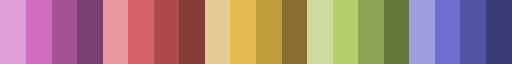

In [32]:
cm.get_cmap('tab20b_r')

In [34]:
threshold = 0.1
# usage_thresholded = usage_norm[cc_geps].sum(axis = 1) > threshold

ind = usage_norm.loc[meta[meta['dataset']==dataset].index, cc_geps].sum(axis = 1) > threshold
label = ind.replace({False:'Cell Cycle\n<= 0.1'})
label.loc[ind] = 'Cell Cycle\n> 0.1'#adata.obs.loc[ind, 'celltype.l2']

In [35]:
usage_cc = (usage_norm.loc[meta[meta['dataset']==dataset].index, :]).copy() #usage.copy()

usage_excl_cc = usage_cc.loc[:, [x for x in usage_cc.columns if x not in cc_geps]]
usage_excl_cc = usage_excl_cc.div(usage_excl_cc.sum(axis=1), axis=0)
print(usage_excl_cc.shape)
usage_excl_cc = usage_excl_cc.dropna() # Excldue cells with 0 usage of GEPs other than cc_geps
print(usage_excl_cc.shape)
usage_cc = usage_cc.loc[usage_excl_cc.index, :]


(399599, 49)
(399599, 49)


In [36]:
identity_max = usage_excl_cc.loc[:, lineage_geps + ['Doublet-Myeloid']].replace(0, np.nan).idxmax(axis = 1)
usage_to_show = pd.concat([usage_cc[cc_geps], usage_excl_cc], axis=1)
cluster_order = ['Cell Cycle\n> 0.1', 'Cell Cycle\n<= 0.1']
nclusters = len(cluster_order)
vmax = usage_to_show.unstack().quantile(.99)

In [66]:
identity_max.value_counts()

CD4-Naive          148113
CD8-EM              46393
CD8-Naive           33120
Th2-Resting         22653
Th17-Resting        21886
Th1-Like            21246
Treg                18115
TEMRA               17260
Th22                14545
CD4-CM              13085
gdT                 10464
Doublet-Myeloid     10250
MAIT                 8643
CD8-Trm              6449
Tfh-2                2898
Tfh-1                2518
Tph                  1961
dtype: int64

In [37]:
ds_res_fc = ds_res[ds_res['dataset']==dataset].sort_values('logRatio', ascending = False)
ds_res_fc.index = ds_res_fc['GEP']

# Order identity GEPs based on association with Cell Cycle
identitygeporder = list(ds_res_fc[ds_res_fc.index.isin(lineage_geps  + ['Doublet-Myeloid'] )].index)
cc_assoc_gep_order = list(ds_res_fc[ds_res_fc.index.isin(set(cc_assoc_geps).difference(lineage_geps))
                                   ].index)
fullgeporder = cc_geps + identitygeporder + cc_assoc_gep_order[:-2]

In [75]:
cc_assoc_gep_order

['NME1/FABP5',
 'TIMD4/TIM3',
 'CTLA4/CD38',
 'ICOS/CD38',
 'Exhaustion',
 'Th17-Activated',
 'HLA',
 'Cytoskeleton',
 'OX40/EBI3',
 'IL10/IL19',
 'Metallothionein']

In [76]:
fullgeporder

['CellCycle-G2M',
 'CellCycle-S',
 'CellCycle-Late-S',
 'Tph',
 'Tfh-1',
 'Tfh-2',
 'TEMRA',
 'CD8-Trm',
 'Treg',
 'Th22',
 'CD4-CM',
 'gdT',
 'CD8-EM',
 'MAIT',
 'Doublet-Myeloid',
 'Th1-Like',
 'Th2-Resting',
 'Th17-Resting',
 'CD8-Naive',
 'CD4-Naive',
 'NME1/FABP5',
 'TIMD4/TIM3',
 'CTLA4/CD38',
 'ICOS/CD38',
 'Exhaustion',
 'Th17-Activated',
 'HLA',
 'Cytoskeleton',
 'OX40/EBI3']

In [77]:
identitygeporder

['Tph',
 'Tfh-1',
 'Tfh-2',
 'TEMRA',
 'CD8-Trm',
 'Treg',
 'Th22',
 'CD4-CM',
 'gdT',
 'CD8-EM',
 'MAIT',
 'Doublet-Myeloid',
 'Th1-Like',
 'Th2-Resting',
 'Th17-Resting',
 'CD8-Naive',
 'CD4-Naive']

In [27]:
legend_fontsize = 7

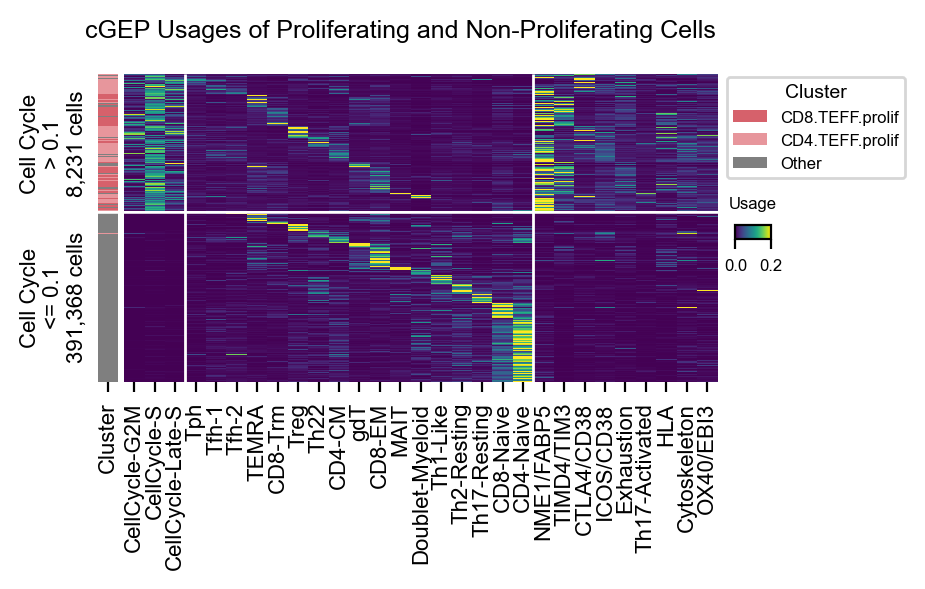

In [50]:
hspace = 0.01
nrows = 2
ncols = 2
vmin = 0


fig = plt.figure(constrained_layout=False, dpi= 200, figsize=(4,2)) 
axes = []
gs = fig.add_gridspec(nrows, ncols, 
                      wspace=0.02, hspace=0, 
                      width_ratios = [1, len(fullgeporder)],
                     height_ratios = [4, 5])

for i in range(nrows):
    rowax = []
    for j in range(ncols):
        if i != (nrows-1):
            rowax.append(fig.add_subplot(gs[i, j]))
        else:
            rowax.append(fig.add_subplot(gs[i, j]))
    axes.append(rowax)
axes = np.array(axes)


for i,c in enumerate(cluster_order):
    # i += 1
    usage_cluster = usage_to_show.loc[label==c, fullgeporder]
    identity_max_cluster = identity_max.loc[usage_cluster.index]
    
    cellorder = []
    for g in identitygeporder:
        cellorder += list(identity_max_cluster.loc[identity_max_cluster==g].sort_values(ascending=False).index)
    cellorder += list(identity_max_cluster[identity_max_cluster.isna()].index)

    usage_cluster = usage_cluster.loc[cellorder, :]
    
    # Plot colorbar corresponding to clustering
    cluster_label = cluster_labels_combat[cellorder] 
    sns.heatmap(pd.DataFrame(cluster_label.map(cmap_clusters_combat), 
                             columns = ['Cluster']), ax=axes[i, 0], 
                vmin=0, vmax=2, 
                yticklabels=False, xticklabels=(i==nrows-1), cbar = False, 
                cmap = rowcolor_cmap_combat, rasterized=True)
    axes[i, 0].tick_params(axis = 'x', labelrotation = 90, labelsize = tick_fontsize)
    
    if i != (nrows-1):
        sns.heatmap(usage_cluster, ax=axes[i, 1], vmin=vmin, vmax=vmax, yticklabels=False, xticklabels=False,
                   cbar = False, cmap = "viridis", rasterized=True)
    else:
        sns.heatmap(usage_cluster, ax=axes[i, 1], vmin=vmin, vmax=vmax, yticklabels=False, 
                    xticklabels=pd.Index(usage_cluster.columns), 
                   cbar = False, cmap = "viridis", rasterized=True)
        axes[i, 1].tick_params(axis = 'x', labelsize = tick_fontsize)
    
    axes[i, 1].vlines(ymin = 0, ymax = usage_cluster.shape[0], x = len(cc_geps),
                  linestyles = '-', colors = 'white', linewidth = 1)
    axes[i, 1].vlines(ymin = 0, ymax = usage_cluster.shape[0], x = len(cc_geps)+len(lineage_geps)+1,
                  linestyles = '-', colors = 'white', linewidth = 1)
    axes[i, 0].set_ylabel(c + '\n%s cells' % f"{len(cellorder):,}", fontsize = label_fontsize-2)
    
    if i==nrows-1:
        axes[i, 0].hlines(xmin = 0, xmax = usage_cluster.shape[1], y = 0,
                      linestyles = '-', colors = 'white', linewidth = 2)
        axes[i, 1].hlines(xmin = 0, xmax = usage_cluster.shape[1], y = 0,
                      linestyles = '-', colors = 'white', linewidth = 2)

cax = axes[1, 1].inset_axes([1.03, -.2, .06, 0.1], transform=axes[0, 1].transAxes)
fig.colorbar(ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), 
                            cmap=sns.color_palette("viridis", as_cmap=True)),
             ax=axes[1, 1], cax=cax, orientation='horizontal')
cax.set_xticks([vmin, vmax])
cax.set_xticklabels(['%.1f' % vmin , #'%.2f' % vmin, 
                     '%.1f' % vmax])
cax.set_title('Usage', fontsize = legend_fontsize-1)
cax.tick_params(labelsize=legend_fontsize-1)


handles_clusters = [Patch(facecolor = col) for (clus, col) in cmap_clusters_legend_combat.items()]
plt.legend(handles_clusters, cmap_clusters_legend_combat, title='Cluster',
           bbox_to_anchor=(.645, .6, 0.5, 0.15), bbox_transform=plt.gcf().transFigure, 
           loc='lower right', fontsize = legend_fontsize-1, title_fontsize = legend_fontsize)

axes[0, 1].set_title('cGEP Usages of Proliferating and Non-Proliferating Cells', x = .465,
                     y=1.15, fontsize = label_fontsize-1)

plt.savefig(os.path.join(figdir, 'ProliferationLineageHeatmap_COMBAT.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'ProliferationLineageHeatmap_COMBAT.pdf'), bbox_inches="tight")

# Proliferative lineages by disease status

In [66]:
results = {}

In [67]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']
lineage_geps = list(gep_info[gep_info['Class']=='Lineage']['Short_Name'].values)
threshold = 0.1

In [69]:
dataset = 'COMBAT'
pheno_col = 'Covid_or_Healthy'

meta_test = pd.read_csv(params.loc[dataset, 'metadata_fn'].replace('metadata', 'metadata_PhenotypeAssociations'),
                  index_col = 0, sep = '\t')


# Max lineage after column-normalizing usages_norm
usage_dat = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t').loc[meta_test.index, :].rename(columns=rename_map)
usage_col_norm = usage_dat.div(usage_dat.sum(axis = 1), axis = 0)
identity_max = usage_col_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
prolif = usage_col_norm[cc_geps].sum(axis = 1) > threshold
summary_data = pd.concat([identity_max, prolif.astype(int), meta_test[pheno_col]], axis=1)
summary_data.columns = ['Lineage', 'Proliferating', 'Phenotype']
summary_data['Phenotype'] = summary_data['Phenotype'].replace({'Covid':'Covid-19', 'Healthy_All':'Healthy'})
results[dataset] = summary_data

ct_all = pd.crosstab(identity_max, prolif)
ct_all = ct_all.div(ct_all.sum(axis=1), axis=0)[True]

ind = meta_test[pheno_col] == 'Covid'
ct_covid = pd.crosstab(identity_max.loc[ind], prolif.loc[ind])
ct_covid = ct_covid.div(ct_covid.sum(axis=1), axis=0)[True]
lineage_order = ct_covid.sort_values(ascending=False).index

In [70]:
lineage_order

Index(['Tph', 'CD8-Trm', 'Tfh-2', 'Tfh-1', 'TEMRA', 'CD4-CM', 'Th22', 'CD8-EM',
       'gdT', 'Treg', 'CD8-Naive', 'MAIT', 'Th1-Like', 'Th17-Resting',
       'Th2-Resting', 'CD4-Naive'],
      dtype='object', name='row_0')

In [73]:
dataset = 'UK-Covid'
pheno_col = 'Overall_Status'

meta_test = pd.read_csv(params.loc[dataset, 'metadata_fn'].replace('metadata', 'metadata_PhenotypeAssociations'),
                  index_col = 0, sep = '\t')


# Max lineage after column-normalizing usages_norm
usage_dat = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t').loc[meta_test.index, :].rename(columns=rename_map)
usage_col_norm = usage_dat.div(usage_dat.sum(axis = 1), axis = 0)
identity_max = usage_col_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
prolif = usage_col_norm[cc_geps].sum(axis = 1) > threshold
summary_data = pd.concat([identity_max, prolif.astype(int), meta_test[pheno_col]], axis=1)
summary_data.columns = ['Lineage', 'Proliferating', 'Phenotype']
summary_data['Phenotype'] = summary_data['Phenotype'].replace({'Covid':'Covid-19'})
summary_data['Phenotype'] = summary_data['Phenotype'].replace({'Covid':'Covid-19', 'Healthy_All':'Healthy'})

results[dataset] = summary_data



/tmp/402154.tmpdir/ipykernel_165012/1828881483.py:4: DtypeWarning: Columns (18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_test = pd.read_csv(params.loc[dataset, 'metadata_fn'].replace('metadata', 'metadata_PhenotypeAssociations'),


"\nct_all = pd.crosstab(identity_max, prolif)\nct_all = ct_all.div(ct_all.sum(axis=1), axis=0)[True]\n\nind = meta_test[pheno_col] == 'Covid'\nct_covid = pd.crosstab(identity_max.loc[ind], prolif.loc[ind])\nct_covid = ct_covid.div(ct_covid.sum(axis=1), axis=0)[True]\n\nind = meta_test[pheno_col] == 'Healthy_All'\nct_healthy = pd.crosstab(identity_max.loc[ind], prolif.loc[ind])\nct_healthy = ct_healthy.div(ct_healthy.sum(axis=1), axis=0)[True]\n\npct_prolif = pd.concat([ct_all, ct_covid, ct_healthy], axis=1)*100\npct_prolif.columns = ['All', 'Covid-19', 'Healthy']\n\npct_prolif = pct_prolif.loc[lineage_order, :]\nresults[dataset] = pct_prolif\n"

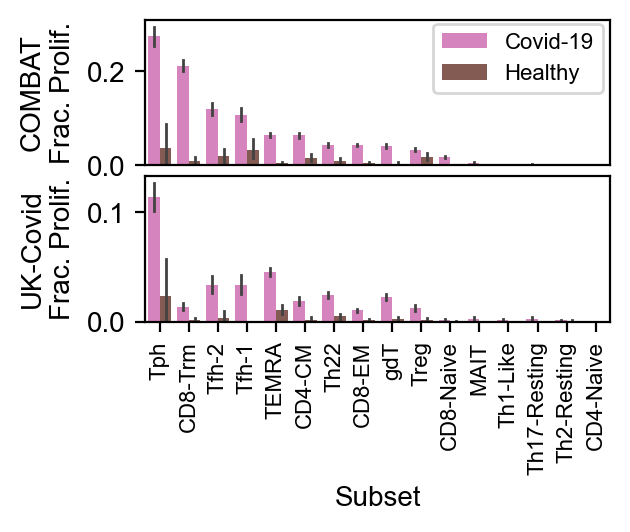

In [29]:
(fig,axes) = plt.subplots(2, 1, figsize=(3,2), dpi=200, gridspec_kw = {'hspace' : 0.07})

cmap = {'Covid-19': sns.color_palette("tab10")[6], 'Healthy':sns.color_palette("tab10")[5]}
for i, dataset in enumerate(['COMBAT', 'UK-Covid']):
    ax = axes[i]
    pct_prolif = results[dataset]
    # for j, pheno in enumerate(['Covid-19', 'Healthy']):
    sns.barplot(x='Lineage', y='Proliferating',
                ax=ax, order=lineage_order,
                palette=cmap, hue='Phenotype', errwidth=1,
                data=results[dataset])
        
        #ax.bar(x = lineage_order, height = pct_prolif.loc[lineage_order, pheno], label=pheno, color=cmap[pheno])
    
    
    if i == 1:
        ax.set_yticks([0, .1])

        ax.set_xlabel('Subset', fontsize=label_fontsize)
        ax.set_xticklabels(lineage_order, rotation=90, fontsize=tick_fontsize)
        ax.get_legend().remove()
    else:
        ax.set_xlabel('')
        ax.set_xticks([])
    
    ax.set_ylabel('%s\nFrac. Prolif.' % dataset, fontsize=label_fontsize)
        
axes[0].legend(fontsize=8, loc=(.62, .5))

plt.savefig(os.path.join(figdir, 'Barplot_PctProlifByLineage_UKCovidANDcombat.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Barplot_PctProlifByLineage_UKCovidANDcombat.pdf'), bbox_inches="tight")

/tmp/402154.tmpdir/ipykernel_165012/236633425.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(x='Lineage', y='Proliferating',
/tmp/402154.tmpdir/ipykernel_165012/236633425.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(x='Lineage', y='Proliferating',
/tmp/402154.tmpdir/ipykernel_165012/236633425.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(lineage_order, rotation=90, fontsize=tick_fontsize)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

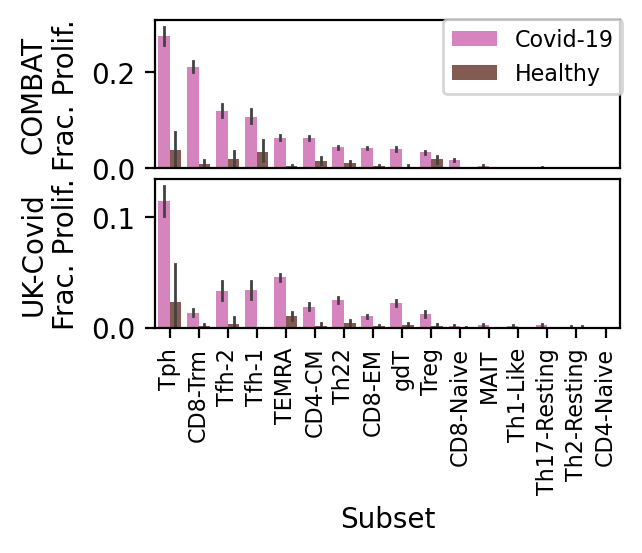

In [27]:
(fig,axes) = plt.subplots(2, 1, figsize=(3,2), dpi=200, gridspec_kw = {'hspace' : 0.07})

cmap = {'Covid-19': sns.color_palette("tab10")[6], 'Healthy':sns.color_palette("tab10")[5]}
for i, dataset in enumerate(['COMBAT', 'UK-Covid']):
    ax = axes[i]
    pct_prolif = results[dataset]
    # for j, pheno in enumerate(['Covid-19', 'Healthy']):
    sns.barplot(x='Lineage', y='Proliferating',
                ax=ax, order=lineage_order,
                palette=cmap, hue='Phenotype', errwidth=1,
                data=results[dataset])
        
        #ax.bar(x = lineage_order, height = pct_prolif.loc[lineage_order, pheno], label=pheno, color=cmap[pheno])
    
    
    if i == 1:
        ax.set_yticks([0, .1])

        ax.set_xlabel('Subset', fontsize=label_fontsize)
        ax.set_xticklabels(lineage_order, rotation=90, fontsize=tick_fontsize)
        ax.get_legend().remove()
    else:
        ax.set_xlabel('')
        ax.set_xticks([])
    
    ax.set_ylabel('%s\nFrac. Prolif.' % dataset, fontsize=label_fontsize)
        
axes[0].legend(fontsize=8, loc=(.62, .5))

plt.savefig(os.path.join(figdir, 'Barplot_PctProlifByLineage_UKCovidANDcombat.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Barplot_PctProlifByLineage_UKCovidANDcombat.pdf'), bbox_inches="tight")

In [87]:
a1 = results['UK-Covid'].groupby(['Lineage', 'Phenotype'])['Proliferating'].mean().reset_index().rename(
    {'Proliferating' : 'UK-Covid_Proliferating'}, axis =1)

In [88]:
a2 = results['COMBAT'].groupby(['Lineage', 'Phenotype'])['Proliferating'].mean().reset_index().rename(
    {'Proliferating' : 'COMBAT_Proliferating'}, axis =1)

In [92]:
prolif_comp = pd.merge(a1, a2, on = ['Lineage', 'Phenotype'])

In [108]:
prolif_comp[prolif_comp['Phenotype']=='Covid-19'][['UK-Covid_Proliferating', 'COMBAT_Proliferating']].corr('pearson')

,UK-Covid_Proliferating,COMBAT_Proliferating
UK-Covid_Proliferating,1.000000,0.798538
COMBAT_Proliferating,0.798538,1.000000


In [104]:
prolif_comp[prolif_comp['Phenotype']=='Covid-19'][['UK-Covid_Proliferating', 'COMBAT_Proliferating']].corr('spearman')

,UK-Covid_Proliferating,COMBAT_Proliferating
UK-Covid_Proliferating,1.000000,0.882353
COMBAT_Proliferating,0.882353,1.000000


In [107]:
prolif_comp[prolif_comp['Phenotype']=='Healthy'][['UK-Covid_Proliferating', 'COMBAT_Proliferating']].corr('pearson')

,UK-Covid_Proliferating,COMBAT_Proliferating
UK-Covid_Proliferating,1.000000,0.556979
COMBAT_Proliferating,0.556979,1.000000


In [106]:
prolif_comp[prolif_comp['Phenotype']=='Healthy'][['UK-Covid_Proliferating', 'COMBAT_Proliferating']].corr('spearman')

,UK-Covid_Proliferating,COMBAT_Proliferating
UK-Covid_Proliferating,1.000000,0.591111
COMBAT_Proliferating,0.591111,1.000000
